In [1]:
import csv
import pandas as pd
import os 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data= pd.read_csv('event_drop.csv',encoding="utf-8") ## 이벤트매치 드랍 
train = pd.read_csv('test_V2.csv',encoding="utf-8")  #dataframe으로 불러오는 코드입니다.
test = pd.read_csv('train_V2.csv',encoding="utf-8")  #dataframe으로 불러오는 코드입니다.
submission = pd.read_csv('sample_submission_V2.csv',encoding="utf-8")  #dataframe으로 불러오는 코드입니다.

'''
Datafield
DBNOs(Down But Not Out)   적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수
assists                   아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)
boosts                    부스트 아이템 사용 횟수
damageDealt               총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)
headshotKills             헤드샷 킬 수
heals                     힐링 아이템 사용 횟수
Id                        플레이어 ID
killPlace                 매치에서의 킬수만 따졋을때 순위
killPoints                킬 수로 산정한 ELO의 개념. rankpoints가 없다면 killPoints가 존재 
killStreaks               짧은 시간동안 최대한 많이 킬했을 때의 킬 수 / 죽지않고 킬을 했을때 
kills                     총 킬 수
longestKill               킬과 킬 사이의 이동한 가장 긴 거리
matchDuration             매치의 시간 (초 단위)
matchId                   매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음)
matchType                 매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치
rankPoints                랭킹 ELO의 개념
revives                   아군 부활 횟수
rideDistance              탈것으로 이동한 총 거리
roadKills                 탈것으로 킬한 횟수
swimDistance              수영한 총 거리
teamKills                 팀킬 횟수
vehicleDestroys           차량 폭파 횟수
walkDistance              걸어간 총 거리
weaponsAcquired           얻은 무기의 수
winPoints                 승리 횟수로 판단한 ELO의 개념
groupId                   매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨
numGroups                 게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)
maxPlace                  경기내 최종 순위
winPlacePerc              예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)
'''

In [3]:
normal_df = data[data['matchType'].str.contains('normal')]

In [4]:
normal_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
265,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,0,1,1,5.65,1950,normal-squad-fpp,16,16,1500,0,3899.0,0,0.00,0,0,3187.00,5,0,0.8000
1289,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.00,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.0,0,0.00,0,0,1137.00,43,0,0.7143
1348,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,1000,6,3,1.48,492,normal-solo-fpp,20,13,-1,0,0.0,0,0.00,0,0,29.57,9,1500,0.4737
1414,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,1500,0,0.0,0,0.00,0,0,16.72,15,0,0.4167
1645,939017b986b77e,9a59e507a409cb,f1566f68443ed0,2,6,89.14,0,0,7,32,0,0,0,0.00,1952,normal-squad-fpp,16,16,1500,1,4194.0,0,0.00,0,0,2563.00,12,0,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436472,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,1500,0,0.0,0,0.00,0,0,186.30,13,0,1.0000
4436494,8a6e0cfad49d29,1b232003f3dd97,2c8112088edb03,1,0,396.00,3,0,3,35,1000,2,1,77.15,854,normal-squad-fpp,6,6,-1,0,0.0,0,0.00,0,0,225.80,17,1500,0.6000
4436801,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,0,1,1,43.38,599,normal-solo-fpp,54,27,1500,0,0.0,0,0.00,0,0,0.00,4,0,0.9434
4436868,905a350913f2fb,042ebe7b4f1322,8c07598a06f7aa,0,5,0.00,0,0,5,35,0,0,0,0.00,1921,normal-squad-fpp,13,13,1500,0,2024.0,0,0.00,0,0,2398.00,4,0,0.4167


In [5]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25386 entries, 265 to 4436965
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               25386 non-null  object 
 1   groupId          25386 non-null  object 
 2   matchId          25386 non-null  object 
 3   assists          25386 non-null  int64  
 4   boosts           25386 non-null  int64  
 5   damageDealt      25386 non-null  float64
 6   DBNOs            25386 non-null  int64  
 7   headshotKills    25386 non-null  int64  
 8   heals            25386 non-null  int64  
 9   killPlace        25386 non-null  int64  
 10  killPoints       25386 non-null  int64  
 11  kills            25386 non-null  int64  
 12  killStreaks      25386 non-null  int64  
 13  longestKill      25386 non-null  float64
 14  matchDuration    25386 non-null  int64  
 15  matchType        25386 non-null  object 
 16  maxPlace         25386 non-null  int64  
 17  numGroup

In [6]:
##핵유저 제거

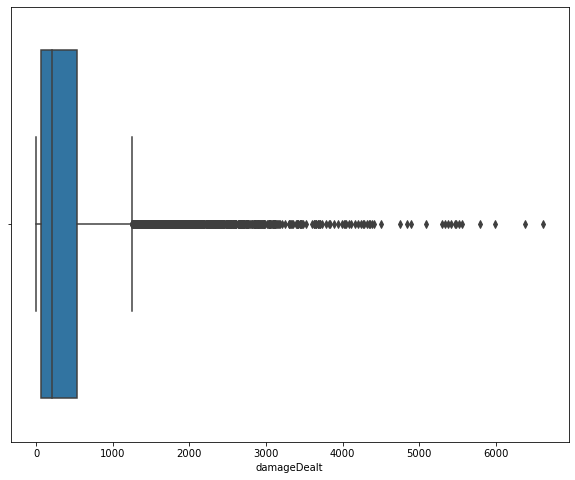

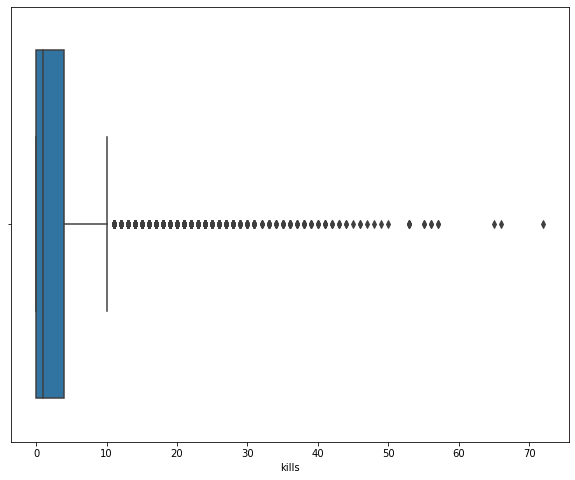

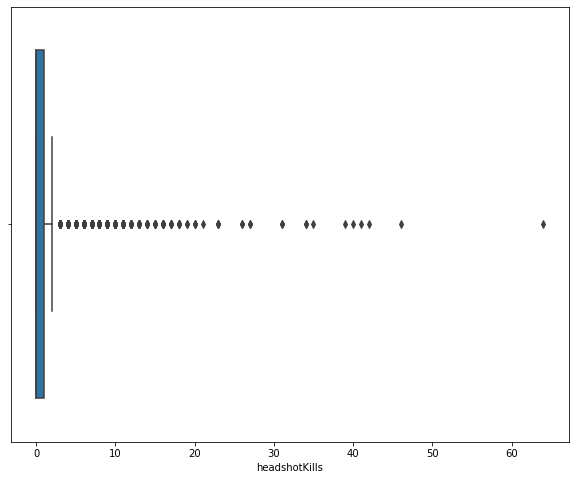

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "damageDealt" , data =normal_df)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x = "kills" , data =normal_df)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x = "headshotKills" , data =normal_df)
plt.show()

In [13]:
## 헤드샷 핵
Head_Hack_user = (normal_df.headshotKills >10)
normal_df[Head_Hack_user]
Hack=normal_df[Head_Hack_user].index
normal_df = normal_df.drop(Hack)
normal_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
265,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,0,1,1,5.65,1950,normal-squad-fpp,16,16,1500,0,3899.0,0,0.00,0,0,3187.00,5,0,0.8000
1289,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.00,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.0,0,0.00,0,0,1137.00,43,0,0.7143
1348,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,1000,6,3,1.48,492,normal-solo-fpp,20,13,-1,0,0.0,0,0.00,0,0,29.57,9,1500,0.4737
1414,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,1500,0,0.0,0,0.00,0,0,16.72,15,0,0.4167
1645,939017b986b77e,9a59e507a409cb,f1566f68443ed0,2,6,89.14,0,0,7,32,0,0,0,0.00,1952,normal-squad-fpp,16,16,1500,1,4194.0,0,0.00,0,0,2563.00,12,0,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436472,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,1500,0,0.0,0,0.00,0,0,186.30,13,0,1.0000
4436494,8a6e0cfad49d29,1b232003f3dd97,2c8112088edb03,1,0,396.00,3,0,3,35,1000,2,1,77.15,854,normal-squad-fpp,6,6,-1,0,0.0,0,0.00,0,0,225.80,17,1500,0.6000
4436801,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,0,1,1,43.38,599,normal-solo-fpp,54,27,1500,0,0.0,0,0.00,0,0,0.00,4,0,0.9434
4436868,905a350913f2fb,042ebe7b4f1322,8c07598a06f7aa,0,5,0.00,0,0,5,35,0,0,0,0.00,1921,normal-squad-fpp,13,13,1500,0,2024.0,0,0.00,0,0,2398.00,4,0,0.4167


In [14]:
## 무적 핵
super_Hack_user = (normal_df.damageDealt >1500) & (normal_df.kills >15) & (normal_df.heals ==0)
normal_df[super_Hack_user]
Hack=normal_df[super_Hack_user].index
normal_df = normal_df.drop(Hack)
normal_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
265,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,0,1,1,5.65,1950,normal-squad-fpp,16,16,1500,0,3899.0,0,0.00,0,0,3187.00,5,0,0.8000
1289,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.00,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.0,0,0.00,0,0,1137.00,43,0,0.7143
1348,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,1000,6,3,1.48,492,normal-solo-fpp,20,13,-1,0,0.0,0,0.00,0,0,29.57,9,1500,0.4737
1414,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,1500,0,0.0,0,0.00,0,0,16.72,15,0,0.4167
1645,939017b986b77e,9a59e507a409cb,f1566f68443ed0,2,6,89.14,0,0,7,32,0,0,0,0.00,1952,normal-squad-fpp,16,16,1500,1,4194.0,0,0.00,0,0,2563.00,12,0,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436472,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,1500,0,0.0,0,0.00,0,0,186.30,13,0,1.0000
4436494,8a6e0cfad49d29,1b232003f3dd97,2c8112088edb03,1,0,396.00,3,0,3,35,1000,2,1,77.15,854,normal-squad-fpp,6,6,-1,0,0.0,0,0.00,0,0,225.80,17,1500,0.6000
4436801,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,0,1,1,43.38,599,normal-solo-fpp,54,27,1500,0,0.0,0,0.00,0,0,0.00,4,0,0.9434
4436868,905a350913f2fb,042ebe7b4f1322,8c07598a06f7aa,0,5,0.00,0,0,5,35,0,0,0,0.00,1921,normal-squad-fpp,13,13,1500,0,2024.0,0,0.00,0,0,2398.00,4,0,0.4167


In [15]:
## 너무 잘하거나 핵 의심유저 , 등수반영에 방해가 됨
Maybe_Hack_user = (normal_df.damageDealt >2500) & (normal_df.kills >25) 
normal_df[Maybe_Hack_user]
Hack=normal_df[Maybe_Hack_user].index
normal_df = normal_df.drop(Hack)
normal_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
265,7bd9e1b45cd3d8,9e132c0869c965,ae4771bde3e2ec,0,3,335.90,1,0,4,16,0,1,1,5.65,1950,normal-squad-fpp,16,16,1500,0,3899.0,0,0.00,0,0,3187.00,5,0,0.8000
1289,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.00,0,6,2,7,0,15,3,69.88,1034,normal-squad-fpp,8,8,1500,0,1657.0,0,0.00,0,0,1137.00,43,0,0.7143
1348,32220283493bc2,a5984ead1bd844,bba3cad7be7edd,2,0,655.20,0,2,0,11,1000,6,3,1.48,492,normal-solo-fpp,20,13,-1,0,0.0,0,0.00,0,0,29.57,9,1500,0.4737
1414,fff91132929a87,87a2de34e6a88a,2da28eebf601db,2,0,245.20,0,0,10,45,0,2,1,19.80,697,normal-squad-fpp,13,12,1500,0,0.0,0,0.00,0,0,16.72,15,0,0.4167
1645,939017b986b77e,9a59e507a409cb,f1566f68443ed0,2,6,89.14,0,0,7,32,0,0,0,0.00,1952,normal-squad-fpp,16,16,1500,1,4194.0,0,0.00,0,0,2563.00,12,0,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436472,455b0ab51addcf,1e83e7cc091df5,8fac94db3260a0,1,4,1300.00,0,5,5,2,0,16,3,109.90,833,normal-squad-fpp,8,8,1500,0,0.0,0,0.00,0,0,186.30,13,0,1.0000
4436494,8a6e0cfad49d29,1b232003f3dd97,2c8112088edb03,1,0,396.00,3,0,3,35,1000,2,1,77.15,854,normal-squad-fpp,6,6,-1,0,0.0,0,0.00,0,0,225.80,17,1500,0.6000
4436801,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,0,1,1,43.38,599,normal-solo-fpp,54,27,1500,0,0.0,0,0.00,0,0,0.00,4,0,0.9434
4436868,905a350913f2fb,042ebe7b4f1322,8c07598a06f7aa,0,5,0.00,0,0,5,35,0,0,0,0.00,1921,normal-squad-fpp,13,13,1500,0,2024.0,0,0.00,0,0,2398.00,4,0,0.4167


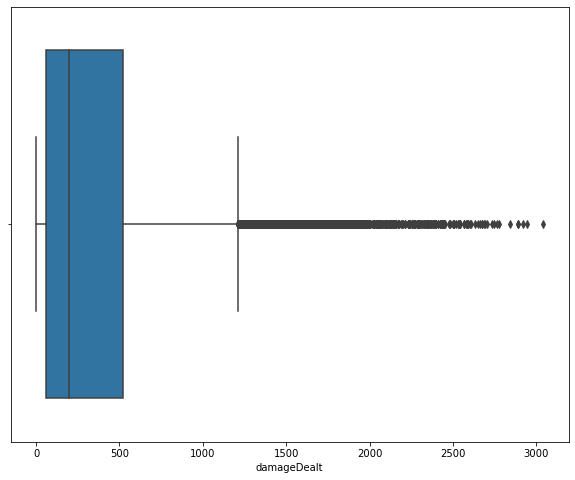

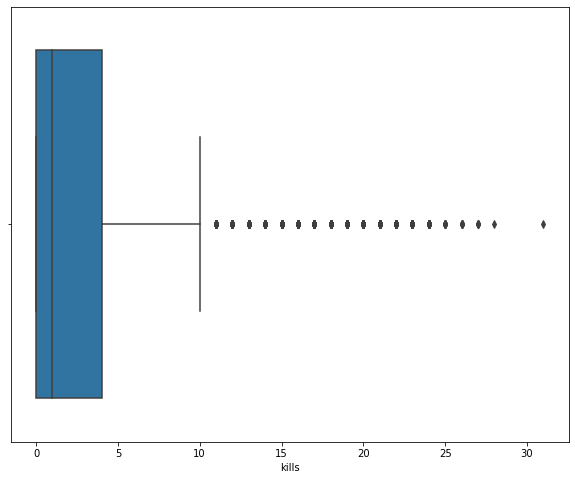

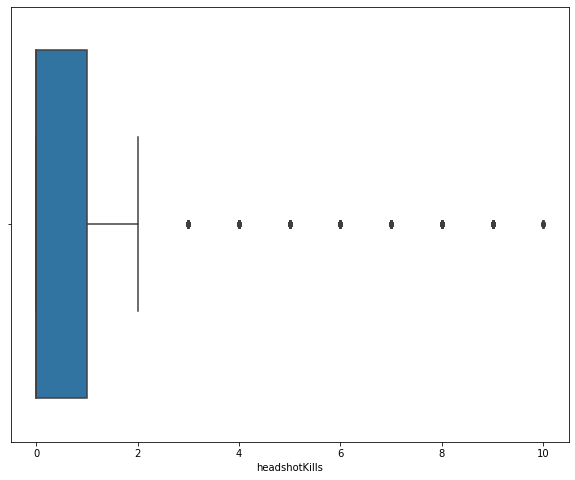

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "damageDealt" , data =normal_df)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x = "kills" , data =normal_df)
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x = "headshotKills" , data =normal_df)
plt.show()

In [12]:
# Hack = (normal_df.damageDealt >1500) & (normal_df.kills >15) & (normal_df.heals ==0)
# Hack = normal_df[Hack].index
# normal_df =normal_df.drop(Hack)
#normal_df = normal_df.drop(Hack_user, axis=1)
# normal_df[Hack].boosts.value_counts()
# normal_df[Hack].heals.value_counts()
# damage = normal_df["damageDealt"].value_counts()
# list= damage > 1500
#(normal_df["damageDealt"]>1500).value_counts()